In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import statsmodels.formula.api as smf

In [2]:
galton = pd.read_csv('../data/galton.csv').drop('Unnamed: 0', axis=1)

In [3]:
galton.head(10)

,variable,value
0,child,61.7
1,child,61.7
2,child,61.7
3,child,61.7
4,child,61.7
5,child,62.2
6,child,62.2
7,child,62.2
8,child,62.2
9,child,62.2


## Draw the Marginal Distribution Graph

In [4]:
 '''
 style: Set the aesthetic style of the plots.
 font_scale: Separate scaling factor to independently scale the size of the font elements.
 '''
sns.set(style='darkgrid',font_scale=2) 

<Figure size 1080x576 with 0 Axes>

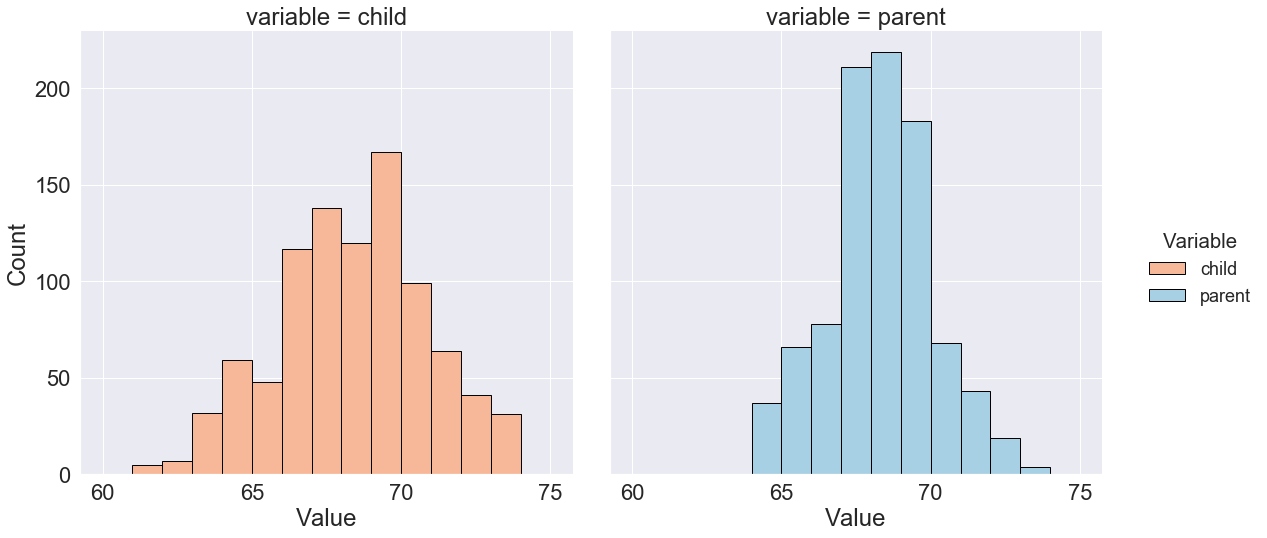

In [5]:

'''
FacetGrid: Multi-plot grid for plotting conditional relationships.
    - col & hue : Variables that define subsets of the data, which will be drawn on separate facets in the grid.
map: Apply a plotting function to each facet’s subset of the data.
''' 
plt.figure(figsize=(15,8))
g = sns.FacetGrid(galton, col='variable', palette='RdBu', hue='variable', margin_titles=True)
g.fig.set_size_inches(16,8)
g = (g.map(plt.hist, 'value',range=[60,75], edgecolor='black', bins=15)
.add_legend(fontsize=18,title='Variable').set_axis_labels(x_var="Value", y_var="Count")
.set(xticks=[60,65,70,75]))

## Comparing childrens' heights and parents' height

Text(0, 0.5, 'Child')

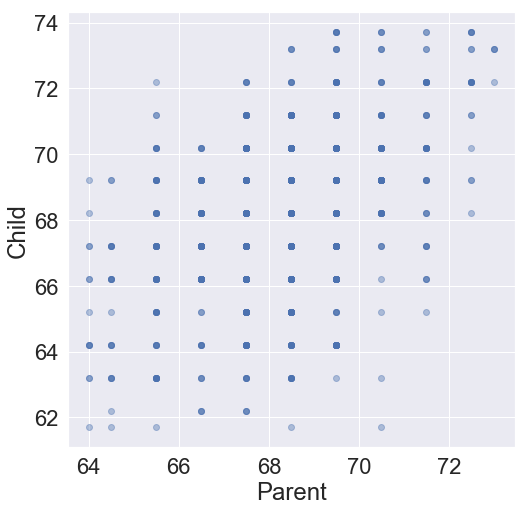

In [7]:
plt.figure(figsize=(8,8))
plt.scatter(x=galton[galton['variable'] == 'parent']['value'], y=galton[galton['variable'] == 'child']['value'], alpha=0.4)
plt.xlabel('Parent')
plt.ylabel('Child')

In [8]:
'''
    Count for the size
'''
counts = Counter([(x, y) for x, y in zip(galton[galton['variable'] == 'child']['value'], galton[galton['variable'] == 'parent']['value'])])
size = [counts[(x, y)] for x, y in zip(galton[galton['variable'] == 'child']['value'], galton[galton['variable'] == 'parent']['value'])]

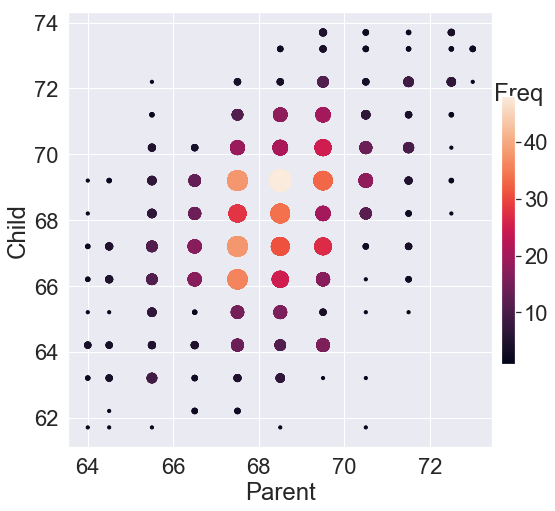

In [9]:
'''
    Draw the scatter plot with the colorbar
'''
plt.figure(figsize=(8,8))
ax = plt.scatter(
    x=galton[galton['variable'] == 'parent']['value'], 
    y=galton[galton['variable'] == 'child']['value'],
    s=[s * 10 for s in size], c=size
)
plt.xlabel('Parent')
plt.ylabel('Child')
bar = plt.colorbar(ax,ticks=[10,20,30,40],fraction=0.03, pad=0.02)
bar.set_label('Freq',labelpad=-30, y=1.05, rotation=0)

## Linear model

In [10]:
child = (galton[galton['variable'] == 'child']['value']).values
parent = (galton[galton['variable'] == 'parent']['value']).values

In [11]:
y = child - child.mean()
x = parent - parent.mean()

In [12]:
model = smf.OLS(y, x).fit()

In [13]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     247.1
Date:                Tue, 05 Mar 2019   Prob (F-statistic):           1.54e-49
Time:                        16:05:37   Log-Likelihood:                -2063.6
No. Observations:                 928   AIC:                             4129.
Df Residuals:                     927   BIC:                             4134.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6463      0.041     15.720      0.0

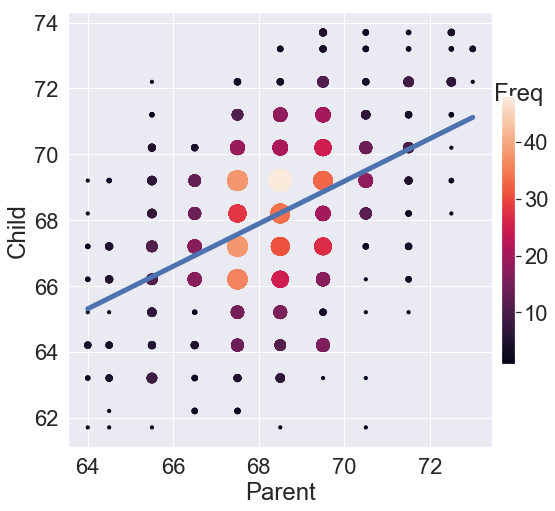

In [14]:
fig = plt.figure(figsize=(8,8))
ax = plt.scatter(
    x=galton[galton['variable'] == 'parent']['value'],
    y=galton[galton['variable'] == 'child']['value'], 
    s=[s * 10 for s in size], 
    c=size
)
X_plot = np.linspace(min(x), max(x), 100)
plt.plot(X_plot + parent.mean(), model.predict(X_plot) + child.mean(), linewidth=5)
plt.xlabel('Parent')
plt.ylabel('Child')
bar = fig.colorbar(ax,ticks=[10, 20, 30, 40],fraction=0.03, pad=0.02)
bar.set_label('Freq',labelpad=-30, y=1.05, rotation=0)